In [361]:

!pip install tensorflow
!pip install keras
!pip install ann_visualizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [362]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
import datetime
from matplotlib import pyplot
from scipy.stats import shapiro
from scipy.stats import normaltest
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import ClusterCentroids
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import itertools
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from yellowbrick.classifier import PrecisionRecallCurve
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils.np_utils import to_categorical
from keras.models import load_model
from keras.wrappers.scikit_learn import KerasClassifier
from ann_visualizer.visualize import ann_viz;
import tensorflow #as tf
from tensorflow import keras
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
import dill as pickle
from IPython.display import display,HTML
from sklearn.impute import SimpleImputer
pd.options.display.max_columns = None

In [363]:
# Pre-processing phase 


In [364]:

datafile = pd.read_excel("DeFRA_updated2012-2020.xlsx")


In [365]:
def ShowDataFileColumnsLenInfoDescribe(datafile):
  pd.options.display.max_columns
  display(HTML("<p style='font-size: 20pt'>"+"The columns within Datafile :\n\n"+"</p>" ))
  display(datafile.columns)
  print("\n\n")
  display(HTML("<p style='font-size: 20pt'>"+'The number of columns:\n\n'+"</p>"))
  display(len(datafile.columns))
  print("\n\n")
  display(HTML("<p style='font-size: 20pt'>"+'The Information about datafile :\n\n'+"</p>"))
  display(datafile.info())
  print("\n\n")
  display(HTML("<p style='font-size: 20pt'>"+'The descriptive statistics about datafile :\n\n'+"</p>"))
  display(datafile.describe())

In [366]:
def CalculatePercentageOfMissingValues(datafile):
  pd.options.display.max_columns
  columnNames = datafile.columns
  PercenMissValues = dict()
  for colNames in columnNames:
    PerMissValues =round((sum(pd.isna(datafile[colNames])/len(datafile[colNames]))*100),3)
    PercenMissValues[colNames]= PerMissValues
  display(HTML("<p style='font-size: 20pt'>"+"The percentage of missing values for each of columns as a dictionary:\n\n"+"</p>"))
  display(PercenMissValues)
  display(HTML("<p style='font-size: 20pt'>"+"The percentage of missing values for each of columns as dataframe:\n\n"+"</p>"))
  percenMissValues = pd.DataFrame(PercenMissValues,index=[0])
  display(percenMissValues)


In [367]:
def RemoveColumnsWIthMoreThan20PercentMissingValues(datafile):
  columnNames = datafile.columns
  PercenMissValues = dict()
  for colNames in columnNames:
    PerMissValues =round((sum(pd.isna(datafile[colNames])/len(datafile[colNames]))*100),3)
    PercenMissValues[colNames]= PerMissValues
  percenMissValues = pd.DataFrame(PercenMissValues,index=[0])
  colMissingValuesMoreThan20 =percenMissValues[percenMissValues.iloc[:,:]>20]
  selected_columns = []
  for col in colMissingValuesMoreThan20.columns:
    if (colMissingValuesMoreThan20[col] >20).any():
      selected_columns.append(col)
  display(HTML("<p style='font-size: 20pt'>"+"The columns to be removed:\n\n"+"</p>"))
  print(selected_columns)
  datafile = datafile.drop(columns=selected_columns)
  print("\n\n")
  datafile= datafile.drop(datafile.index[-10:]) 

In [368]:
def RemovedColumnsWIthMoreThan20PercentMissingValuesData(datafile):
  columnNames = datafile.columns
  PercenMissValues = dict()
  for colNames in columnNames:
    PerMissValues =round((sum(pd.isna(datafile[colNames])/len(datafile[colNames]))*100),3)
    PercenMissValues[colNames]= PerMissValues
  percenMissValues = pd.DataFrame(PercenMissValues,index=[0])
  colMissingValuesMoreThan20 =percenMissValues[percenMissValues.iloc[:,:]>20]
  selected_columns = []
  for col in colMissingValuesMoreThan20.columns:
    if (colMissingValuesMoreThan20[col] >20).any():
      selected_columns.append(col)
  datafile = datafile.drop(columns=selected_columns)
  datafile= datafile.drop(datafile.index[-10:])
  return datafile

In [370]:
def RemoveRowsWithNOFollowUpVisits(datafile):
  datafile['count'] = datafile.groupby('ID')['ID'].transform('count')
  display(HTML("<p style='font-size: 20pt'>"+"Adding the count column to datafile:\n\n"+"</p>"))
  display(datafile[datafile["count"] <2].head(5))
  print("\n\n")
  print(HTML("<p style='font-size: 20pt'>"+"Indexes from datafile which should be dropped, had less than 2 followups visits:"+"</p>"))
  display(datafile[datafile["count"] <2].index)
  print("\n\n")
  lessThan2RecordsIndexes =datafile[datafile["count"] <2].index
  datafile = datafile.drop(lessThan2RecordsIndexes)
  #display(HTML("<p style='font-size: 25pt'>"+"Datafile after dropping records with less than 2 followup visits:"+"</p>"))
  #display(datafile)
  print("\n\n")
  display(HTML("<p style='font-size: 20pt'>"+"The shape of a datafile after dropping records with less than 2 visits is:\n\n"+"</p>"))
  display(datafile.shape)

In [371]:
def RemovedRowsWithNOFollowUpVisitsDatafile(datafile):
  datafile['count'] = datafile.groupby('ID')['ID'].transform('count')
  lessThan2RecordsIndexes =datafile[datafile["count"] <2].index
  datafile = datafile.drop(lessThan2RecordsIndexes)
  return datafile

In [372]:
def RemovedRowsWhichHaveNoIDDatafile(datafile):
  datafile= datafile[datafile["ID"].notna()]
  return datafile

In [373]:
# Sorting by ID, age ,Date_Insertion
def SortingDatafileById(datafile):
  datafile = datafile.sort_values(["ID","Age","Date_Insertion"], ascending=(True,True,True))
  return datafile

In [374]:
def ImputingMissingValues(datafile):
# Imputing missing values for  numerical and categorical attribute  for  " Tscore" and "BMD"
# Create an instance of the SimpleImputer class
  imputer_Tscore = SimpleImputer(strategy='mean')
  imputer_BMD = SimpleImputer(strategy='most_frequent')
# Use the fit_transform method to impute the missing values
  datafile['Tscore'] = imputer_Tscore.fit_transform(datafile[['Tscore']])
  datafile['BMD'] = imputer_BMD.fit_transform(datafile[['BMD']])
  return datafile

In [375]:
def CreatedNewColumnAndCalcDifference(datafile):
  datafile['StartTscore'] = datafile.groupby(['ID'])['Tscore'].fillna(0)
  datafile['StartTscore'] = datafile['StartTscore'].mask(datafile['ID'].duplicated()).ffill()
  datafile['DateDifference'] = datafile.groupby('ID')['Date_Insertion'].\
                    diff().apply(lambda x: x.days).fillna(0)
  datafile['Tscorediff'] = datafile.groupby(['ID'])['Tscore'].diff().fillna(0)

  datafile['DiffWeight'] = datafile.groupby(['ID'])['Weight'].diff().fillna(0)
  return datafile


In [376]:
def DroppingRowWithDateDiffLessThanZeroAndTscoreMoreThanZero(datafile):
  # Dropping all rows which have column DateDifference <=0 
  DateDiffIndexes = datafile[abs(datafile["DateDifference"])<=7].index
  datafile.drop(DateDiffIndexes, inplace=True)
  # Dropping all rows which have column Tscorediff>=0 
  TscoreDiffIndexes = datafile[datafile["Tscorediff"]>=0].index
  datafile.drop(TscoreDiffIndexes, inplace=True)
  return datafile

In [377]:
def CalculateAndAddTscoreRate(datafile):
  #Calculate TScore rate
  datafile['TscoreRate'] = abs(((datafile['Tscorediff']/datafile['Tscore']*100)/datafile['DateDifference']))
  return datafile
  # World Health Organization considering that TscoreRate >3% per 365 days is " High" and TscoreRate < 3% per 365 days is "Low" 


In [378]:
def DropAditionalColumns(datafile):
  datafile.drop(columns=["ID","Weight","Concultance","Province","Region","Specialty","Setting","DateDifference","Tscorediff","Date_Insertion","count"], axis=1, inplace=True)
  return datafile

In [379]:
def OneCodeEncodingCategoricalColumns(datafile):
#One hot encode
# Identifying categorical columns to One Hot encode
  OneHotEncColumns =[]
  for col in datafile.columns:
    if datafile[col].dtype =="object":
      OneHotEncColumns.append(col)
  for cl in OneHotEncColumns:
    datafile = pd.concat([datafile, pd.get_dummies(datafile[[cl]])], axis = 1)
    datafile.drop(labels = [cl], axis = 1, inplace = True)
  datafile["TscoreRate_"]=datafile["TscoreRate"]*1
  datafile.drop(columns="TscoreRate", inplace=True)
  return datafile

**EXPLORING THE DATAFILE**

In [380]:
ShowDataFileColumnsLenInfoDescribe(datafile)

Index(['Concultance', 'Province', 'Region', 'Specialty', 'Setting', 'ID',
       'Age', 'Date_Insertion', 'Weight', 'Height', 'Smoking', 'Alcohol',
       'FractureFamilialHistory', 'PreviousFemureFractures',
       'PreviousNonFemurFractures', 'Other disaese', 'Steroid',
       'FollowUp fracture', 'BMD', 'Tscore', 'TscoreColonna', 'Sctx',
       'FemureFractureRisk (10 yrs)', 'ClinicalFractureRisk (10yrs)',
       'Milk consumption', 'Yoghurt consumption', 'Cheese consumption',
       'OtherCalciumIntake', 'SunExposure', 'SeaHolidays', 'VitaminD',
       'Calcium', 'Falls', 'CurrentTherapies', 'Compliance', 'AdverseEvents',
       'PrescribedTherapy'],
      dtype='object')

37

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149078 entries, 0 to 149077
Data columns (total 37 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   Concultance                   149068 non-null  float64       
 1   Province                      148242 non-null  object        
 2   Region                        149068 non-null  object        
 3   Specialty                     149068 non-null  object        
 4   Setting                       149068 non-null  object        
 5   ID                            149068 non-null  float64       
 6   Age                           149068 non-null  float64       
 7   Date_Insertion                149068 non-null  datetime64[ns]
 8   Weight                        149068 non-null  float64       
 9   Height                        149068 non-null  float64       
 10  Smoking                       149068 non-null  object        
 11  Alcohol      

None

,Concultance,ID,Age,Weight,Height,Tscore,TscoreColonna,FemureFractureRisk (10 yrs),ClinicalFractureRisk (10yrs),Yoghurt consumption,SeaHolidays,Falls
count,149068.000000,149068.000000,149068.000000,149068.000000,149068.000000,135795.000000,69537.000000,149068.000000,149068.000000,55904.000000,55395.000000,59263.000000
mean,3816.006702,73553.129223,65.931790,62.772874,159.483484,-2.228040,-2.371504,7.142120,16.419812,0.552733,0.507428,0.309468
std,4822.513535,50136.889863,9.152205,11.612596,6.967118,0.929495,1.025419,21.219616,23.991081,0.640093,0.499949,0.862431
min,1.000000,4.000000,50.000000,30.000000,94.000000,-5.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,639.000000,29653.750000,59.000000,55.000000,155.000000,-2.800000,-3.100000,1.330000,6.180000,0.000000,0.000000,0.000000
50%,2626.000000,62384.000000,65.000000,61.000000,160.000000,-2.300000,-2.500000,3.050000,9.420000,0.000000,1.000000,0.000000
75%,3746.000000,124878.250000,73.000000,70.000000,164.000000,-1.700000,-1.700000,6.860000,16.000000,1.000000,1.000000,0.000000
max,21050.000000,162406.000000,95.000000,150.000000,250.000000,0.000000,0.000000,2701.000000,1717.000000,5.000000,1.000000,10.000000


**CALCULATING THE PERCENTAGE OF MISSING VALUES**

In [381]:
CalculatePercentageOfMissingValues(datafile)

{'Concultance': 0.007,
 'Province': 0.561,
 'Region': 0.007,
 'Specialty': 0.007,
 'Setting': 0.007,
 'ID': 0.007,
 'Age': 0.007,
 'Date_Insertion': 0.007,
 'Weight': 0.007,
 'Height': 0.007,
 'Smoking': 0.007,
 'Alcohol': 0.007,
 'FractureFamilialHistory': 0.007,
 'PreviousFemureFractures': 0.007,
 'PreviousNonFemurFractures': 0.007,
 'Other disaese': 0.007,
 'Steroid': 0.007,
 'FollowUp fracture': 86.757,
 'BMD': 8.91,
 'Tscore': 8.91,
 'TscoreColonna': 53.355,
 'Sctx': 91.486,
 'FemureFractureRisk (10 yrs)': 0.007,
 'ClinicalFractureRisk (10yrs)': 0.007,
 'Milk consumption': 61.094,
 'Yoghurt consumption': 62.5,
 'Cheese consumption': 66.381,
 'OtherCalciumIntake': 96.792,
 'SunExposure': 61.929,
 'SeaHolidays': 62.842,
 'VitaminD': 59.646,
 'Calcium': 63.435,
 'Falls': 60.247,
 'CurrentTherapies': 0.0,
 'Compliance': 77.703,
 'AdverseEvents': 97.835,
 'PrescribedTherapy': 0.0}

,Concultance,Province,Region,Specialty,Setting,ID,Age,Date_Insertion,Weight,Height,Smoking,Alcohol,FractureFamilialHistory,PreviousFemureFractures,PreviousNonFemurFractures,Other disaese,Steroid,FollowUp fracture,BMD,Tscore,TscoreColonna,Sctx,FemureFractureRisk (10 yrs),ClinicalFractureRisk (10yrs),Milk consumption,Yoghurt consumption,Cheese consumption,OtherCalciumIntake,SunExposure,SeaHolidays,VitaminD,Calcium,Falls,CurrentTherapies,Compliance,AdverseEvents,PrescribedTherapy
0,0.007,0.561,0.007,0.007,0.007,0.007,0.007,0.007,0.007,0.007,0.007,0.007,0.007,0.007,0.007,0.007,0.007,86.757,8.91,8.91,53.355,91.486,0.007,0.007,61.094,62.5,66.381,96.792,61.929,62.842,59.646,63.435,60.247,0.0,77.703,97.835,0.0


**REMOVING COLUMNS WITH MORE THAN 20% OF MISSING VALUES**

In [382]:
RemoveColumnsWIthMoreThan20PercentMissingValues(datafile)

['FollowUp fracture', 'TscoreColonna', 'Sctx', 'Milk consumption', 'Yoghurt consumption', 'Cheese consumption', 'OtherCalciumIntake', 'SunExposure', 'SeaHolidays', 'VitaminD', 'Calcium', 'Falls', 'Compliance', 'AdverseEvents']





**DATAFILE AFTER REMOVING 20% OF MISING VALUES**

In [383]:
RemovedColumnsWIthMoreThan20PercentMissingValuesData(datafile)

,Concultance,Province,Region,Specialty,Setting,ID,Age,Date_Insertion,Weight,Height,Smoking,Alcohol,FractureFamilialHistory,PreviousFemureFractures,PreviousNonFemurFractures,Other disaese,Steroid,BMD,Tscore,FemureFractureRisk (10 yrs),ClinicalFractureRisk (10yrs),CurrentTherapies,PrescribedTherapy
0,16.0,RN,Emilia Romagna,Reumatologia,Ospedale,29.0,65.0,2012-03-22 16:18:00,50.0,156.0,No,No,Yes,No,No,No,No,Spine,-1.9,2.13,7.39,none,none
1,16.0,RN,Emilia Romagna,Reumatologia,Ospedale,29.0,73.0,2020-11-12 16:20:00,49.5,151.0,No,No,Yes,No,No,No,No,Femure neck,-1.4,3.02,9.19,none,none
2,16.0,RN,Emilia Romagna,Reumatologia,Ospedale,30.0,69.0,2012-03-22 16:48:00,63.0,165.0,No,No,Yes,No,No,No,No,Femure neck,-1.9,3.59,9.87,alendronato,none
3,16.0,RN,Emilia Romagna,Reumatologia,Ospedale,30.0,71.0,2014-05-22 15:36:00,67.0,165.0,No,No,Yes,No,No,No,No,Femure neck,-1.7,3.45,9.98,alendronato,none
4,29.0,TO,Piemonte,Endocrinologia,Ospedale,39.0,65.0,2012-03-26 14:03:00,65.0,160.0,No,No,No,Yes1,No,No,No,Femure total,-2.5,7.02,21.00,none,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149063,17810.0,TO,Piemonte,Altro,Clinica privata,162402.0,52.0,2020-11-16 09:40:00,83.0,170.0,No,No,No,No,No,No,No,Femure neck,-0.5,0.14,3.11,none,none
149064,17810.0,TO,Piemonte,Altro,Clinica privata,162403.0,80.0,2020-11-16 09:56:00,77.0,163.0,No,No,No,No,No,No,No,Femure neck,-2.0,4.60,12.00,none,none
149065,168.0,BZ,Trentino Alto Adige,Reumatologia,Ospedale,162404.0,84.0,2020-11-16 10:08:00,70.0,168.0,No,No,No,No,Yes1,No,No,Femure total,-1.9,4.74,12.00,none,alendronato + vit. D
149066,2003.0,FE,Emilia Romagna,Reumatologia,Ospedale,162405.0,61.0,2020-11-16 10:08:00,40.0,155.0,No,No,No,No,No,No,No,Spine,-3.1,1.58,5.76,none,none


**REMOVING ROWS RECORDS WITH NO FOLLOWUP VISITS**

In [384]:
RemoveRowsWithNOFollowUpVisits(RemovedColumnsWIthMoreThan20PercentMissingValuesData(datafile))

,Concultance,Province,Region,Specialty,Setting,ID,Age,Date_Insertion,Weight,Height,Smoking,Alcohol,FractureFamilialHistory,PreviousFemureFractures,PreviousNonFemurFractures,Other disaese,Steroid,BMD,Tscore,FemureFractureRisk (10 yrs),ClinicalFractureRisk (10yrs),CurrentTherapies,PrescribedTherapy,count
31760,11.0,AL,Piemonte,Reumatologia,Ospedale,4.0,60.0,2012-03-16 09:28:00,56.0,162.0,Si>10,Yes<3,No,No,Yes,Lupus,No,Femure neck,-2.35,6.21,16.00,none,none,1
31761,12.0,TO,Piemonte,Reumatologia,Ambulatorio privato,5.0,63.0,2012-03-16 10:43:00,55.0,154.0,No,Yes<3,No,No,No,No,No,Spine,-1.70,1.03,5.69,none,none,1
31762,13.0,TO,Piemonte,Fisiatria,Ospedale,6.0,67.0,2012-03-16 20:45:00,56.0,156.0,No,No,Yes,No,No,No,No,Femure neck,-2.50,5.72,12.00,none,none,1
31763,13.0,TO,Piemonte,Fisiatria,Ospedale,7.0,62.0,2012-03-16 20:54:00,54.0,156.0,No,No,Yes,Yes1,No,No,No,Femure neck,-3.00,15.00,26.00,none,none,1
31764,14.0,TV,Veneto,Medicina interna,Ospedale,8.0,70.0,2012-03-17 18:49:00,58.0,163.0,Si<10,Yes<3,No,No,No,No,No,Spine,-4.00,6.10,12.00,none,none,1





<IPython.core.display.HTML object>


Int64Index([ 31760,  31761,  31762,  31763,  31764,  31765,  31766,  31767,
             31768,  31769,
            ...
            149058, 149059, 149060, 149061, 149062, 149063, 149064, 149065,
            149066, 149067],
           dtype='int64', length=117308)

(31760, 24)

**DATAFILE AFTER REMOVING RECORDS WITH NO FOLOWWUP VISITS**

In [385]:
RemovedRowsWithNOFollowUpVisitsDatafile(RemovedColumnsWIthMoreThan20PercentMissingValuesData(datafile))

,Concultance,Province,Region,Specialty,Setting,ID,Age,Date_Insertion,Weight,Height,Smoking,Alcohol,FractureFamilialHistory,PreviousFemureFractures,PreviousNonFemurFractures,Other disaese,Steroid,BMD,Tscore,FemureFractureRisk (10 yrs),ClinicalFractureRisk (10yrs),CurrentTherapies,PrescribedTherapy,count
0,16.0,RN,Emilia Romagna,Reumatologia,Ospedale,29.0,65.0,2012-03-22 16:18:00,50.0,156.0,No,No,Yes,No,No,No,No,Spine,-1.9,2.13,7.39,none,none,2
1,16.0,RN,Emilia Romagna,Reumatologia,Ospedale,29.0,73.0,2020-11-12 16:20:00,49.5,151.0,No,No,Yes,No,No,No,No,Femure neck,-1.4,3.02,9.19,none,none,2
2,16.0,RN,Emilia Romagna,Reumatologia,Ospedale,30.0,69.0,2012-03-22 16:48:00,63.0,165.0,No,No,Yes,No,No,No,No,Femure neck,-1.9,3.59,9.87,alendronato,none,2
3,16.0,RN,Emilia Romagna,Reumatologia,Ospedale,30.0,71.0,2014-05-22 15:36:00,67.0,165.0,No,No,Yes,No,No,No,No,Femure neck,-1.7,3.45,9.98,alendronato,none,2
4,29.0,TO,Piemonte,Endocrinologia,Ospedale,39.0,65.0,2012-03-26 14:03:00,65.0,160.0,No,No,No,Yes1,No,No,No,Femure total,-2.5,7.02,21.00,none,none,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31755,1331.0,BZ,Trentino Alto Adige,Fisiatria,Ospedale,161994.0,74.0,2020-10-30 11:00:00,69.0,158.0,No,No,No,No,No,No,No,Femure neck,-2.6,5.90,14.00,alendronato,none,2
31756,21020.0,AL,Piemonte,Medicina interna,Ambulatorio privato,162114.0,63.0,2020-11-03 18:13:00,59.0,159.0,No,No,Yes,No,No,No,No,Femure total,-1.6,1.67,6.88,none,none,2
31757,21020.0,AL,Piemonte,Medicina interna,Ambulatorio privato,162114.0,63.0,2020-11-03 17:22:00,59.0,159.0,No,No,No,No,No,No,No,Femure total,-1.6,1.05,5.73,none,none,2
31758,15407.0,MI,Lombardia,Reumatologia,Ospedale,162300.0,59.0,2020-11-10 13:05:00,57.0,169.0,No,No,No,No,Yes1,No,No,Femure total,-1.2,0.49,4.04,none,none,2


**REMOVING ROWS WHICH HAVE NO IDS**

**DATAFILE AFTER ROWS WITH NO IDS BEING REMOVED**

In [387]:
RemovedRowsWhichHaveNoIDDatafile(RemovedRowsWithNOFollowUpVisitsDatafile(RemovedColumnsWIthMoreThan20PercentMissingValuesData(datafile)))

,Concultance,Province,Region,Specialty,Setting,ID,Age,Date_Insertion,Weight,Height,Smoking,Alcohol,FractureFamilialHistory,PreviousFemureFractures,PreviousNonFemurFractures,Other disaese,Steroid,BMD,Tscore,FemureFractureRisk (10 yrs),ClinicalFractureRisk (10yrs),CurrentTherapies,PrescribedTherapy,count
0,16.0,RN,Emilia Romagna,Reumatologia,Ospedale,29.0,65.0,2012-03-22 16:18:00,50.0,156.0,No,No,Yes,No,No,No,No,Spine,-1.9,2.13,7.39,none,none,2
1,16.0,RN,Emilia Romagna,Reumatologia,Ospedale,29.0,73.0,2020-11-12 16:20:00,49.5,151.0,No,No,Yes,No,No,No,No,Femure neck,-1.4,3.02,9.19,none,none,2
2,16.0,RN,Emilia Romagna,Reumatologia,Ospedale,30.0,69.0,2012-03-22 16:48:00,63.0,165.0,No,No,Yes,No,No,No,No,Femure neck,-1.9,3.59,9.87,alendronato,none,2
3,16.0,RN,Emilia Romagna,Reumatologia,Ospedale,30.0,71.0,2014-05-22 15:36:00,67.0,165.0,No,No,Yes,No,No,No,No,Femure neck,-1.7,3.45,9.98,alendronato,none,2
4,29.0,TO,Piemonte,Endocrinologia,Ospedale,39.0,65.0,2012-03-26 14:03:00,65.0,160.0,No,No,No,Yes1,No,No,No,Femure total,-2.5,7.02,21.00,none,none,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31755,1331.0,BZ,Trentino Alto Adige,Fisiatria,Ospedale,161994.0,74.0,2020-10-30 11:00:00,69.0,158.0,No,No,No,No,No,No,No,Femure neck,-2.6,5.90,14.00,alendronato,none,2
31756,21020.0,AL,Piemonte,Medicina interna,Ambulatorio privato,162114.0,63.0,2020-11-03 18:13:00,59.0,159.0,No,No,Yes,No,No,No,No,Femure total,-1.6,1.67,6.88,none,none,2
31757,21020.0,AL,Piemonte,Medicina interna,Ambulatorio privato,162114.0,63.0,2020-11-03 17:22:00,59.0,159.0,No,No,No,No,No,No,No,Femure total,-1.6,1.05,5.73,none,none,2
31758,15407.0,MI,Lombardia,Reumatologia,Ospedale,162300.0,59.0,2020-11-10 13:05:00,57.0,169.0,No,No,No,No,Yes1,No,No,Femure total,-1.2,0.49,4.04,none,none,2


**SORTING DATAFILE BY ID, DATE AND AGE**

In [388]:
SortingDatafileById(RemovedRowsWhichHaveNoIDDatafile(RemovedRowsWithNOFollowUpVisitsDatafile(RemovedColumnsWIthMoreThan20PercentMissingValuesData(datafile))))

,Concultance,Province,Region,Specialty,Setting,ID,Age,Date_Insertion,Weight,Height,Smoking,Alcohol,FractureFamilialHistory,PreviousFemureFractures,PreviousNonFemurFractures,Other disaese,Steroid,BMD,Tscore,FemureFractureRisk (10 yrs),ClinicalFractureRisk (10yrs),CurrentTherapies,PrescribedTherapy,count
0,16.0,RN,Emilia Romagna,Reumatologia,Ospedale,29.0,65.0,2012-03-22 16:18:00,50.0,156.0,No,No,Yes,No,No,No,No,Spine,-1.9,2.13,7.39,none,none,2
1,16.0,RN,Emilia Romagna,Reumatologia,Ospedale,29.0,73.0,2020-11-12 16:20:00,49.5,151.0,No,No,Yes,No,No,No,No,Femure neck,-1.4,3.02,9.19,none,none,2
2,16.0,RN,Emilia Romagna,Reumatologia,Ospedale,30.0,69.0,2012-03-22 16:48:00,63.0,165.0,No,No,Yes,No,No,No,No,Femure neck,-1.9,3.59,9.87,alendronato,none,2
3,16.0,RN,Emilia Romagna,Reumatologia,Ospedale,30.0,71.0,2014-05-22 15:36:00,67.0,165.0,No,No,Yes,No,No,No,No,Femure neck,-1.7,3.45,9.98,alendronato,none,2
4,29.0,TO,Piemonte,Endocrinologia,Ospedale,39.0,65.0,2012-03-26 14:03:00,65.0,160.0,No,No,No,Yes1,No,No,No,Femure total,-2.5,7.02,21.00,none,none,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31754,1331.0,BZ,Trentino Alto Adige,Fisiatria,Ospedale,161994.0,74.0,2020-11-12 16:20:00,69.0,158.0,No,No,No,No,No,No,No,Femure neck,-2.6,5.90,14.00,alendronato,none,2
31757,21020.0,AL,Piemonte,Medicina interna,Ambulatorio privato,162114.0,63.0,2020-11-03 17:22:00,59.0,159.0,No,No,No,No,No,No,No,Femure total,-1.6,1.05,5.73,none,none,2
31756,21020.0,AL,Piemonte,Medicina interna,Ambulatorio privato,162114.0,63.0,2020-11-03 18:13:00,59.0,159.0,No,No,Yes,No,No,No,No,Femure total,-1.6,1.67,6.88,none,none,2
31759,15407.0,MI,Lombardia,Reumatologia,Ospedale,162300.0,59.0,2020-11-10 13:01:00,57.0,169.0,No,No,No,No,Yes1,No,No,Femure neck,-1.2,0.49,4.04,none,none,2


**IMPUTING MISSING VALUES**

In [389]:
ImputingMissingValues(SortingDatafileById(RemovedRowsWhichHaveNoIDDatafile(RemovedRowsWithNOFollowUpVisitsDatafile(RemovedColumnsWIthMoreThan20PercentMissingValuesData(datafile)))))

,Concultance,Province,Region,Specialty,Setting,ID,Age,Date_Insertion,Weight,Height,Smoking,Alcohol,FractureFamilialHistory,PreviousFemureFractures,PreviousNonFemurFractures,Other disaese,Steroid,BMD,Tscore,FemureFractureRisk (10 yrs),ClinicalFractureRisk (10yrs),CurrentTherapies,PrescribedTherapy,count
0,16.0,RN,Emilia Romagna,Reumatologia,Ospedale,29.0,65.0,2012-03-22 16:18:00,50.0,156.0,No,No,Yes,No,No,No,No,Spine,-1.9,2.13,7.39,none,none,2
1,16.0,RN,Emilia Romagna,Reumatologia,Ospedale,29.0,73.0,2020-11-12 16:20:00,49.5,151.0,No,No,Yes,No,No,No,No,Femure neck,-1.4,3.02,9.19,none,none,2
2,16.0,RN,Emilia Romagna,Reumatologia,Ospedale,30.0,69.0,2012-03-22 16:48:00,63.0,165.0,No,No,Yes,No,No,No,No,Femure neck,-1.9,3.59,9.87,alendronato,none,2
3,16.0,RN,Emilia Romagna,Reumatologia,Ospedale,30.0,71.0,2014-05-22 15:36:00,67.0,165.0,No,No,Yes,No,No,No,No,Femure neck,-1.7,3.45,9.98,alendronato,none,2
4,29.0,TO,Piemonte,Endocrinologia,Ospedale,39.0,65.0,2012-03-26 14:03:00,65.0,160.0,No,No,No,Yes1,No,No,No,Femure total,-2.5,7.02,21.00,none,none,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31754,1331.0,BZ,Trentino Alto Adige,Fisiatria,Ospedale,161994.0,74.0,2020-11-12 16:20:00,69.0,158.0,No,No,No,No,No,No,No,Femure neck,-2.6,5.90,14.00,alendronato,none,2
31757,21020.0,AL,Piemonte,Medicina interna,Ambulatorio privato,162114.0,63.0,2020-11-03 17:22:00,59.0,159.0,No,No,No,No,No,No,No,Femure total,-1.6,1.05,5.73,none,none,2
31756,21020.0,AL,Piemonte,Medicina interna,Ambulatorio privato,162114.0,63.0,2020-11-03 18:13:00,59.0,159.0,No,No,Yes,No,No,No,No,Femure total,-1.6,1.67,6.88,none,none,2
31759,15407.0,MI,Lombardia,Reumatologia,Ospedale,162300.0,59.0,2020-11-10 13:01:00,57.0,169.0,No,No,No,No,Yes1,No,No,Femure neck,-1.2,0.49,4.04,none,none,2


**DATAFILE AFTER StartTscore,DateDifference,Tscorediff,DiffWeight BEING CREATED**

In [390]:
CreatedNewColumnAndCalcDifference(ImputingMissingValues(SortingDatafileById(RemovedRowsWhichHaveNoIDDatafile(RemovedRowsWithNOFollowUpVisitsDatafile(RemovedColumnsWIthMoreThan20PercentMissingValuesData(datafile))))))

,Concultance,Province,Region,Specialty,Setting,ID,Age,Date_Insertion,Weight,Height,Smoking,Alcohol,FractureFamilialHistory,PreviousFemureFractures,PreviousNonFemurFractures,Other disaese,Steroid,BMD,Tscore,FemureFractureRisk (10 yrs),ClinicalFractureRisk (10yrs),CurrentTherapies,PrescribedTherapy,count,StartTscore,DateDifference,Tscorediff,DiffWeight
0,16.0,RN,Emilia Romagna,Reumatologia,Ospedale,29.0,65.0,2012-03-22 16:18:00,50.0,156.0,No,No,Yes,No,No,No,No,Spine,-1.9,2.13,7.39,none,none,2,-1.9,0.0,0.0,0.0
1,16.0,RN,Emilia Romagna,Reumatologia,Ospedale,29.0,73.0,2020-11-12 16:20:00,49.5,151.0,No,No,Yes,No,No,No,No,Femure neck,-1.4,3.02,9.19,none,none,2,-1.9,3157.0,0.5,-0.5
2,16.0,RN,Emilia Romagna,Reumatologia,Ospedale,30.0,69.0,2012-03-22 16:48:00,63.0,165.0,No,No,Yes,No,No,No,No,Femure neck,-1.9,3.59,9.87,alendronato,none,2,-1.9,0.0,0.0,0.0
3,16.0,RN,Emilia Romagna,Reumatologia,Ospedale,30.0,71.0,2014-05-22 15:36:00,67.0,165.0,No,No,Yes,No,No,No,No,Femure neck,-1.7,3.45,9.98,alendronato,none,2,-1.9,790.0,0.2,4.0
4,29.0,TO,Piemonte,Endocrinologia,Ospedale,39.0,65.0,2012-03-26 14:03:00,65.0,160.0,No,No,No,Yes1,No,No,No,Femure total,-2.5,7.02,21.00,none,none,2,-2.5,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31754,1331.0,BZ,Trentino Alto Adige,Fisiatria,Ospedale,161994.0,74.0,2020-11-12 16:20:00,69.0,158.0,No,No,No,No,No,No,No,Femure neck,-2.6,5.90,14.00,alendronato,none,2,-2.6,13.0,0.0,0.0
31757,21020.0,AL,Piemonte,Medicina interna,Ambulatorio privato,162114.0,63.0,2020-11-03 17:22:00,59.0,159.0,No,No,No,No,No,No,No,Femure total,-1.6,1.05,5.73,none,none,2,-1.6,0.0,0.0,0.0
31756,21020.0,AL,Piemonte,Medicina interna,Ambulatorio privato,162114.0,63.0,2020-11-03 18:13:00,59.0,159.0,No,No,Yes,No,No,No,No,Femure total,-1.6,1.67,6.88,none,none,2,-1.6,0.0,0.0,0.0
31759,15407.0,MI,Lombardia,Reumatologia,Ospedale,162300.0,59.0,2020-11-10 13:01:00,57.0,169.0,No,No,No,No,Yes1,No,No,Femure neck,-1.2,0.49,4.04,none,none,2,-1.2,0.0,0.0,0.0


**Dropping RowS With Date Diff Less Than Zero And Tscore More Than Zero**

In [391]:
DroppingRowWithDateDiffLessThanZeroAndTscoreMoreThanZero(CreatedNewColumnAndCalcDifference(ImputingMissingValues(SortingDatafileById(RemovedRowsWhichHaveNoIDDatafile(RemovedRowsWithNOFollowUpVisitsDatafile(RemovedColumnsWIthMoreThan20PercentMissingValuesData(datafile)))))))

,Concultance,Province,Region,Specialty,Setting,ID,Age,Date_Insertion,Weight,Height,Smoking,Alcohol,FractureFamilialHistory,PreviousFemureFractures,PreviousNonFemurFractures,Other disaese,Steroid,BMD,Tscore,FemureFractureRisk (10 yrs),ClinicalFractureRisk (10yrs),CurrentTherapies,PrescribedTherapy,count,StartTscore,DateDifference,Tscorediff,DiffWeight
7,16.0,RN,Emilia Romagna,Reumatologia,Ospedale,50.0,65.0,2019-04-09 15:38:00,67.0,161.0,No,No,No,No,No,No,No,Spine,-3.0,2.07,7.79,ibandronato,none,2,-2.800000,2569.0,-0.200000,2.0
11,16.0,RN,Emilia Romagna,Reumatologia,Ospedale,60.0,75.0,2013-11-26 09:00:00,69.0,160.0,No,Yes<3,No,No,Yes1,No,No,Femure neck,-3.4,12.00,23.00,risedronato,none,2,-3.300000,608.0,-0.100000,0.0
19,16.0,RN,Emilia Romagna,Reumatologia,Ospedale,93.0,65.0,2014-01-28 13:18:00,68.0,175.0,No,No,Yes,No,No,No,No,Spine,-3.1,5.22,13.00,none,none,3,-2.500000,668.0,-0.600000,0.0
22,16.0,RN,Emilia Romagna,Reumatologia,Ospedale,139.0,60.0,2019-02-19 14:46:00,67.0,174.0,No,Yes<3,No,No,No,No,No,Femure neck,-2.3,1.80,6.59,none,none,2,-1.830000,2513.0,-0.470000,2.0
24,16.0,RN,Emilia Romagna,Reumatologia,Ospedale,140.0,66.0,2019-02-19 14:32:00,62.0,169.0,No,No,Yes,No,No,No,No,Femure total,-2.9,7.70,14.00,risedronato,none,2,-1.780000,2513.0,-1.120000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31623,14010.0,PV,Lombardia,Endocrinologia,Ospedale,157359.0,73.0,2020-07-07 14:44:00,66.5,160.0,No,Yes<3,No,No,No,No,No,Femure neck,-2.2,3.91,11.00,none,none,2,-2.100000,126.0,-0.100000,0.5
31631,2031.0,VA,Lombardia,Altro,Ambulatorio privato,157611.0,76.0,2020-06-16 10:58:00,70.0,155.0,No,No,No,Yes>2,No,No,No,Femure neck,-2.3,20.00,53.00,denosumab,denosumab,2,-2.286645,94.0,-0.013355,0.0
31663,13942.0,MI,Lombardia,Medicina generale,Ambulatorio privato,158153.0,73.0,2020-08-04 11:45:00,67.0,149.0,No,Yes<3,No,No,No,No,No,Spine,-3.4,4.92,13.00,none,none,2,-2.286645,61.0,-1.113355,0.0
31675,16556.0,RN,Emilia Romagna,Altro,Ambulatorio privato,158700.0,69.0,2020-08-05 16:31:00,67.0,165.0,Si<10,No,No,No,No,No,No,Femure neck,-1.6,2.01,7.40,none,alendronato,2,-1.100000,41.0,-0.500000,0.0


**CALCULATING AND ADDING NEW COLUMN TSCORERATE**

In [392]:
CalculateAndAddTscoreRate(DroppingRowWithDateDiffLessThanZeroAndTscoreMoreThanZero(CreatedNewColumnAndCalcDifference(ImputingMissingValues(SortingDatafileById(RemovedRowsWhichHaveNoIDDatafile(RemovedRowsWithNOFollowUpVisitsDatafile(RemovedColumnsWIthMoreThan20PercentMissingValuesData(datafile))))))))

,Concultance,Province,Region,Specialty,Setting,ID,Age,Date_Insertion,Weight,Height,Smoking,Alcohol,FractureFamilialHistory,PreviousFemureFractures,PreviousNonFemurFractures,Other disaese,Steroid,BMD,Tscore,FemureFractureRisk (10 yrs),ClinicalFractureRisk (10yrs),CurrentTherapies,PrescribedTherapy,count,StartTscore,DateDifference,Tscorediff,DiffWeight,TscoreRate
7,16.0,RN,Emilia Romagna,Reumatologia,Ospedale,50.0,65.0,2019-04-09 15:38:00,67.0,161.0,No,No,No,No,No,No,No,Spine,-3.0,2.07,7.79,ibandronato,none,2,-2.800000,2569.0,-0.200000,2.0,0.002595
11,16.0,RN,Emilia Romagna,Reumatologia,Ospedale,60.0,75.0,2013-11-26 09:00:00,69.0,160.0,No,Yes<3,No,No,Yes1,No,No,Femure neck,-3.4,12.00,23.00,risedronato,none,2,-3.300000,608.0,-0.100000,0.0,0.004837
19,16.0,RN,Emilia Romagna,Reumatologia,Ospedale,93.0,65.0,2014-01-28 13:18:00,68.0,175.0,No,No,Yes,No,No,No,No,Spine,-3.1,5.22,13.00,none,none,3,-2.500000,668.0,-0.600000,0.0,0.028974
22,16.0,RN,Emilia Romagna,Reumatologia,Ospedale,139.0,60.0,2019-02-19 14:46:00,67.0,174.0,No,Yes<3,No,No,No,No,No,Femure neck,-2.3,1.80,6.59,none,none,2,-1.830000,2513.0,-0.470000,2.0,0.008132
24,16.0,RN,Emilia Romagna,Reumatologia,Ospedale,140.0,66.0,2019-02-19 14:32:00,62.0,169.0,No,No,Yes,No,No,No,No,Femure total,-2.9,7.70,14.00,risedronato,none,2,-1.780000,2513.0,-1.120000,1.0,0.015368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31623,14010.0,PV,Lombardia,Endocrinologia,Ospedale,157359.0,73.0,2020-07-07 14:44:00,66.5,160.0,No,Yes<3,No,No,No,No,No,Femure neck,-2.2,3.91,11.00,none,none,2,-2.100000,126.0,-0.100000,0.5,0.036075
31631,2031.0,VA,Lombardia,Altro,Ambulatorio privato,157611.0,76.0,2020-06-16 10:58:00,70.0,155.0,No,No,No,Yes>2,No,No,No,Femure neck,-2.3,20.00,53.00,denosumab,denosumab,2,-2.286645,94.0,-0.013355,0.0,0.006177
31663,13942.0,MI,Lombardia,Medicina generale,Ambulatorio privato,158153.0,73.0,2020-08-04 11:45:00,67.0,149.0,No,Yes<3,No,No,No,No,No,Spine,-3.4,4.92,13.00,none,none,2,-2.286645,61.0,-1.113355,0.0,0.536815
31675,16556.0,RN,Emilia Romagna,Altro,Ambulatorio privato,158700.0,69.0,2020-08-05 16:31:00,67.0,165.0,Si<10,No,No,No,No,No,No,Femure neck,-1.6,2.01,7.40,none,alendronato,2,-1.100000,41.0,-0.500000,0.0,0.762195


**DROPPING COLUMNS "ID","Weight","Concultance","Province","Region","Specialty","Setting","DateDifference","Tscorediff","Date_Insertion","count"**

In [393]:
DropAditionalColumns(CalculateAndAddTscoreRate(DroppingRowWithDateDiffLessThanZeroAndTscoreMoreThanZero(CreatedNewColumnAndCalcDifference(ImputingMissingValues(SortingDatafileById(RemovedRowsWhichHaveNoIDDatafile(RemovedRowsWithNOFollowUpVisitsDatafile(RemovedColumnsWIthMoreThan20PercentMissingValuesData(datafile)))))))))

,Age,Height,Smoking,Alcohol,FractureFamilialHistory,PreviousFemureFractures,PreviousNonFemurFractures,Other disaese,Steroid,BMD,Tscore,FemureFractureRisk (10 yrs),ClinicalFractureRisk (10yrs),CurrentTherapies,PrescribedTherapy,StartTscore,DiffWeight,TscoreRate
7,65.0,161.0,No,No,No,No,No,No,No,Spine,-3.0,2.07,7.79,ibandronato,none,-2.800000,2.0,0.002595
11,75.0,160.0,No,Yes<3,No,No,Yes1,No,No,Femure neck,-3.4,12.00,23.00,risedronato,none,-3.300000,0.0,0.004837
19,65.0,175.0,No,No,Yes,No,No,No,No,Spine,-3.1,5.22,13.00,none,none,-2.500000,0.0,0.028974
22,60.0,174.0,No,Yes<3,No,No,No,No,No,Femure neck,-2.3,1.80,6.59,none,none,-1.830000,2.0,0.008132
24,66.0,169.0,No,No,Yes,No,No,No,No,Femure total,-2.9,7.70,14.00,risedronato,none,-1.780000,1.0,0.015368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31623,73.0,160.0,No,Yes<3,No,No,No,No,No,Femure neck,-2.2,3.91,11.00,none,none,-2.100000,0.5,0.036075
31631,76.0,155.0,No,No,No,Yes>2,No,No,No,Femure neck,-2.3,20.00,53.00,denosumab,denosumab,-2.286645,0.0,0.006177
31663,73.0,149.0,No,Yes<3,No,No,No,No,No,Spine,-3.4,4.92,13.00,none,none,-2.286645,0.0,0.536815
31675,69.0,165.0,Si<10,No,No,No,No,No,No,Femure neck,-1.6,2.01,7.40,none,alendronato,-1.100000,0.0,0.762195


**ONE CODE ENCODING FOR CATEGORICAL ATTRIBUTES**

In [394]:
OneCodeEncodingCategoricalColumns(DropAditionalColumns(CalculateAndAddTscoreRate(DroppingRowWithDateDiffLessThanZeroAndTscoreMoreThanZero(CreatedNewColumnAndCalcDifference(ImputingMissingValues(SortingDatafileById(RemovedRowsWhichHaveNoIDDatafile(RemovedRowsWithNOFollowUpVisitsDatafile(RemovedColumnsWIthMoreThan20PercentMissingValuesData(datafile))))))))))

,Age,Height,Tscore,FemureFractureRisk (10 yrs),ClinicalFractureRisk (10yrs),StartTscore,DiffWeight,Smoking_No,Smoking_Si<10,Smoking_Si>10,Alcohol_No,Alcohol_Yes<3,Alcohol_Yes>3,FractureFamilialHistory_No,FractureFamilialHistory_Yes,PreviousFemureFractures_No,PreviousFemureFractures_Yes1,PreviousFemureFractures_Yes2,PreviousFemureFractures_Yes>1,PreviousFemureFractures_Yes>2,PreviousNonFemurFractures_No,PreviousNonFemurFractures_Yes,PreviousNonFemurFractures_Yes1,PreviousNonFemurFractures_Yes2,PreviousNonFemurFractures_Yes>2,Other disaese_Altre connettiviti,Other disaese_Artrite psoriasica,Other disaese_Artrite reumatoide,Other disaese_Lupus,Other disaese_No,Other disaese_Sclerodermia,Steroid_>2.5<5mg,Steroid_>5mg,Steroid_No,BMD_Femure neck,BMD_Femure total,BMD_Spine,BMD_US calcaneus,BMD_US phalanx,CurrentTherapies_SERMS o ormoni,CurrentTherapies_alendronato,CurrentTherapies_alendronato + vit. D,CurrentTherapies_denosumab,CurrentTherapies_ibandronato,CurrentTherapies_none,CurrentTherapies_ranelato di stronzio,CurrentTherapies_risedronato,CurrentTherapies_teriparatide,CurrentTherapies_zoledronato,PrescribedTherapy_SERMS o ormoni,PrescribedTherapy_alendronato,PrescribedTherapy_alendronato + vit. D,PrescribedTherapy_denosumab,PrescribedTherapy_ibandronato,PrescribedTherapy_none,PrescribedTherapy_ranelato di stronzio,PrescribedTherapy_risedronato,PrescribedTherapy_teriparatide,PrescribedTherapy_zoledronato,TscoreRate_
7,65.0,161.0,-3.0,2.07,7.79,-2.800000,2.0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.002595
11,75.0,160.0,-3.4,12.00,23.00,-3.300000,0.0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0.004837
19,65.0,175.0,-3.1,5.22,13.00,-2.500000,0.0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.028974
22,60.0,174.0,-2.3,1.80,6.59,-1.830000,2.0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.008132
24,66.0,169.0,-2.9,7.70,14.00,-1.780000,1.0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0.015368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31623,73.0,160.0,-2.2,3.91,11.00,-2.100000,0.5,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.036075
31631,76.0,155.0,-2.3,20.00,53.00,-2.286645,0.0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.006177
31663,73.0,149.0,-3.4,4.92,13.00,-2.286645,0.0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.536815
31675,69.0,165.0,-1.6,2.01,7.40,-1.100000,0.0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.762195


**ASSIGNING ONE CODE ENCODED DATAFILE TO A VARIABLE DATAFILE**

In [395]:
datafile = OneCodeEncodingCategoricalColumns(DropAditionalColumns(CalculateAndAddTscoreRate(DroppingRowWithDateDiffLessThanZeroAndTscoreMoreThanZero(CreatedNewColumnAndCalcDifference(ImputingMissingValues(SortingDatafileById(RemovedRowsWhichHaveNoIDDatafile(RemovedRowsWithNOFollowUpVisitsDatafile(RemovedColumnsWIthMoreThan20PercentMissingValuesData(datafile))))))))))
datafile

,Age,Height,Tscore,FemureFractureRisk (10 yrs),ClinicalFractureRisk (10yrs),StartTscore,DiffWeight,Smoking_No,Smoking_Si<10,Smoking_Si>10,Alcohol_No,Alcohol_Yes<3,Alcohol_Yes>3,FractureFamilialHistory_No,FractureFamilialHistory_Yes,PreviousFemureFractures_No,PreviousFemureFractures_Yes1,PreviousFemureFractures_Yes2,PreviousFemureFractures_Yes>1,PreviousFemureFractures_Yes>2,PreviousNonFemurFractures_No,PreviousNonFemurFractures_Yes,PreviousNonFemurFractures_Yes1,PreviousNonFemurFractures_Yes2,PreviousNonFemurFractures_Yes>2,Other disaese_Altre connettiviti,Other disaese_Artrite psoriasica,Other disaese_Artrite reumatoide,Other disaese_Lupus,Other disaese_No,Other disaese_Sclerodermia,Steroid_>2.5<5mg,Steroid_>5mg,Steroid_No,BMD_Femure neck,BMD_Femure total,BMD_Spine,BMD_US calcaneus,BMD_US phalanx,CurrentTherapies_SERMS o ormoni,CurrentTherapies_alendronato,CurrentTherapies_alendronato + vit. D,CurrentTherapies_denosumab,CurrentTherapies_ibandronato,CurrentTherapies_none,CurrentTherapies_ranelato di stronzio,CurrentTherapies_risedronato,CurrentTherapies_teriparatide,CurrentTherapies_zoledronato,PrescribedTherapy_SERMS o ormoni,PrescribedTherapy_alendronato,PrescribedTherapy_alendronato + vit. D,PrescribedTherapy_denosumab,PrescribedTherapy_ibandronato,PrescribedTherapy_none,PrescribedTherapy_ranelato di stronzio,PrescribedTherapy_risedronato,PrescribedTherapy_teriparatide,PrescribedTherapy_zoledronato,TscoreRate_
7,65.0,161.0,-3.0,2.07,7.79,-2.800000,2.0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.002595
11,75.0,160.0,-3.4,12.00,23.00,-3.300000,0.0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0.004837
19,65.0,175.0,-3.1,5.22,13.00,-2.500000,0.0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.028974
22,60.0,174.0,-2.3,1.80,6.59,-1.830000,2.0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.008132
24,66.0,169.0,-2.9,7.70,14.00,-1.780000,1.0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0.015368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31623,73.0,160.0,-2.2,3.91,11.00,-2.100000,0.5,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.036075
31631,76.0,155.0,-2.3,20.00,53.00,-2.286645,0.0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.006177
31663,73.0,149.0,-3.4,4.92,13.00,-2.286645,0.0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.536815
31675,69.0,165.0,-1.6,2.01,7.40,-1.100000,0.0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.762195


**PRODUCING HISTOGRAM OF THE TSCORERATE**

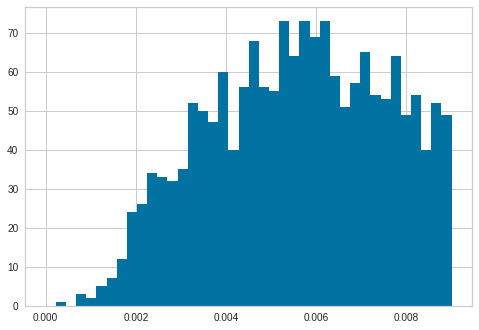

In [396]:
plt.hist(datafile['TscoreRate_'],40,range=[0, .009],  align='mid')
plt.show()

**CREATING TARGET VARIABLE Progression Rate**

In [397]:

conditions = [
    #(datafile['TscoreRate_'] < 0.0082) & (datafile['TscoreRate_'] >= 0.0027),
    (datafile['TscoreRate_'] < 0.0062),
    (datafile['TscoreRate_'] >= 0.0062)]
choices = [1, 0]
datafile['Progression Rate'] = np.select(conditions, choices, default = 'Invalid')

**ENCODING TARGET VARIABLE**

In [398]:

le = LabelEncoder()
# Fit the encoder to the column
le.fit(datafile["Progression Rate"])
# Transform the column to integers
datafile["Progression Rate"] = le.transform(datafile["Progression Rate"])

**PIE CHART FOR 2 CLASSES **

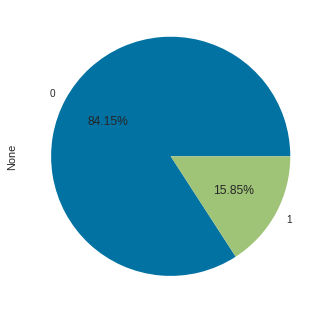

In [400]:
datafile.groupby('Progression Rate').size().plot(kind='pie', autopct='%1.2f%%')

**COUNTER PLOT FOR CLASSES**

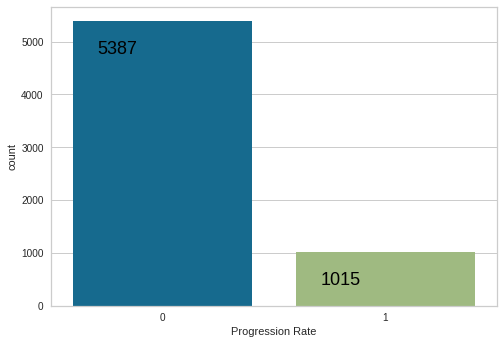

In [401]:
ax = sns.countplot(x=datafile['Progression Rate'], data = datafile);
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x() + 0.2, p.get_height()), ha = 'center', va = 'top', color = 'black', size = 18)

**DROPPING TSCORERATE AND TSCORE SINCE WE DONT NEED THEM**

In [402]:
datafile.drop(columns=["TscoreRate_"], inplace=True)
datafile.drop(columns="Tscore", inplace=True)

In [403]:
datafile

,Age,Height,FemureFractureRisk (10 yrs),ClinicalFractureRisk (10yrs),StartTscore,DiffWeight,Smoking_No,Smoking_Si<10,Smoking_Si>10,Alcohol_No,Alcohol_Yes<3,Alcohol_Yes>3,FractureFamilialHistory_No,FractureFamilialHistory_Yes,PreviousFemureFractures_No,PreviousFemureFractures_Yes1,PreviousFemureFractures_Yes2,PreviousFemureFractures_Yes>1,PreviousFemureFractures_Yes>2,PreviousNonFemurFractures_No,PreviousNonFemurFractures_Yes,PreviousNonFemurFractures_Yes1,PreviousNonFemurFractures_Yes2,PreviousNonFemurFractures_Yes>2,Other disaese_Altre connettiviti,Other disaese_Artrite psoriasica,Other disaese_Artrite reumatoide,Other disaese_Lupus,Other disaese_No,Other disaese_Sclerodermia,Steroid_>2.5<5mg,Steroid_>5mg,Steroid_No,BMD_Femure neck,BMD_Femure total,BMD_Spine,BMD_US calcaneus,BMD_US phalanx,CurrentTherapies_SERMS o ormoni,CurrentTherapies_alendronato,CurrentTherapies_alendronato + vit. D,CurrentTherapies_denosumab,CurrentTherapies_ibandronato,CurrentTherapies_none,CurrentTherapies_ranelato di stronzio,CurrentTherapies_risedronato,CurrentTherapies_teriparatide,CurrentTherapies_zoledronato,PrescribedTherapy_SERMS o ormoni,PrescribedTherapy_alendronato,PrescribedTherapy_alendronato + vit. D,PrescribedTherapy_denosumab,PrescribedTherapy_ibandronato,PrescribedTherapy_none,PrescribedTherapy_ranelato di stronzio,PrescribedTherapy_risedronato,PrescribedTherapy_teriparatide,PrescribedTherapy_zoledronato,Progression Rate
7,65.0,161.0,2.07,7.79,-2.800000,2.0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
11,75.0,160.0,12.00,23.00,-3.300000,0.0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
19,65.0,175.0,5.22,13.00,-2.500000,0.0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
22,60.0,174.0,1.80,6.59,-1.830000,2.0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
24,66.0,169.0,7.70,14.00,-1.780000,1.0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31623,73.0,160.0,3.91,11.00,-2.100000,0.5,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
31631,76.0,155.0,20.00,53.00,-2.286645,0.0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
31663,73.0,149.0,4.92,13.00,-2.286645,0.0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
31675,69.0,165.0,2.01,7.40,-1.100000,0.0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


**SPLITTING DATA INTO INDEPENDENT AND DEPENDENT VARIABLES**

In [404]:

Y = datafile["Progression Rate"]
X = datafile.drop(columns="Progression Rate")

**NORMALIZING NUMERICAL COLUMNS**

In [405]:
#Normalise numerical columns
def Normalize(dataframe, col_name):
    dataframe[col_name] = dataframe[col_name].apply(lambda x: (x - datafile[col_name].min()) / (datafile[col_name].max() - datafile[col_name].min()))

Normalize(X, 'Age')
Normalize(X, 'FemureFractureRisk (10 yrs)')
Normalize(X, 'ClinicalFractureRisk (10yrs)')
Normalize(X, 'DiffWeight'),
Normalize(X, 'Height'),
Normalize(X, 'StartTscore'),
print(X.shape)


(6402, 58)


In [406]:
X

,Age,Height,FemureFractureRisk (10 yrs),ClinicalFractureRisk (10yrs),StartTscore,DiffWeight,Smoking_No,Smoking_Si<10,Smoking_Si>10,Alcohol_No,Alcohol_Yes<3,Alcohol_Yes>3,FractureFamilialHistory_No,FractureFamilialHistory_Yes,PreviousFemureFractures_No,PreviousFemureFractures_Yes1,PreviousFemureFractures_Yes2,PreviousFemureFractures_Yes>1,PreviousFemureFractures_Yes>2,PreviousNonFemurFractures_No,PreviousNonFemurFractures_Yes,PreviousNonFemurFractures_Yes1,PreviousNonFemurFractures_Yes2,PreviousNonFemurFractures_Yes>2,Other disaese_Altre connettiviti,Other disaese_Artrite psoriasica,Other disaese_Artrite reumatoide,Other disaese_Lupus,Other disaese_No,Other disaese_Sclerodermia,Steroid_>2.5<5mg,Steroid_>5mg,Steroid_No,BMD_Femure neck,BMD_Femure total,BMD_Spine,BMD_US calcaneus,BMD_US phalanx,CurrentTherapies_SERMS o ormoni,CurrentTherapies_alendronato,CurrentTherapies_alendronato + vit. D,CurrentTherapies_denosumab,CurrentTherapies_ibandronato,CurrentTherapies_none,CurrentTherapies_ranelato di stronzio,CurrentTherapies_risedronato,CurrentTherapies_teriparatide,CurrentTherapies_zoledronato,PrescribedTherapy_SERMS o ormoni,PrescribedTherapy_alendronato,PrescribedTherapy_alendronato + vit. D,PrescribedTherapy_denosumab,PrescribedTherapy_ibandronato,PrescribedTherapy_none,PrescribedTherapy_ranelato di stronzio,PrescribedTherapy_risedronato,PrescribedTherapy_teriparatide,PrescribedTherapy_zoledronato
7,0.340909,0.652174,0.006163,0.014865,0.440000,0.54,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
11,0.568182,0.637681,0.036913,0.056812,0.340000,0.50,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
19,0.340909,0.855072,0.015917,0.029233,0.500000,0.50,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
22,0.227273,0.840580,0.005326,0.011555,0.634000,0.54,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
24,0.363636,0.768116,0.023597,0.031991,0.644000,0.52,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31623,0.522727,0.637681,0.011861,0.023718,0.580000,0.51,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
31631,0.590909,0.565217,0.061687,0.139548,0.542671,0.50,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
31663,0.522727,0.478261,0.014988,0.029233,0.542671,0.50,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
31675,0.431818,0.710145,0.005977,0.013789,0.780000,0.50,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0


**SPLITTING DATA INTO TRAIN AND TEST**

In [407]:
XTrain, XTest, yTrain, yTest = train_test_split(X, Y, test_size = 0.2, random_state = 4)

In [408]:
XTrain


,Age,Height,FemureFractureRisk (10 yrs),ClinicalFractureRisk (10yrs),StartTscore,DiffWeight,Smoking_No,Smoking_Si<10,Smoking_Si>10,Alcohol_No,Alcohol_Yes<3,Alcohol_Yes>3,FractureFamilialHistory_No,FractureFamilialHistory_Yes,PreviousFemureFractures_No,PreviousFemureFractures_Yes1,PreviousFemureFractures_Yes2,PreviousFemureFractures_Yes>1,PreviousFemureFractures_Yes>2,PreviousNonFemurFractures_No,PreviousNonFemurFractures_Yes,PreviousNonFemurFractures_Yes1,PreviousNonFemurFractures_Yes2,PreviousNonFemurFractures_Yes>2,Other disaese_Altre connettiviti,Other disaese_Artrite psoriasica,Other disaese_Artrite reumatoide,Other disaese_Lupus,Other disaese_No,Other disaese_Sclerodermia,Steroid_>2.5<5mg,Steroid_>5mg,Steroid_No,BMD_Femure neck,BMD_Femure total,BMD_Spine,BMD_US calcaneus,BMD_US phalanx,CurrentTherapies_SERMS o ormoni,CurrentTherapies_alendronato,CurrentTherapies_alendronato + vit. D,CurrentTherapies_denosumab,CurrentTherapies_ibandronato,CurrentTherapies_none,CurrentTherapies_ranelato di stronzio,CurrentTherapies_risedronato,CurrentTherapies_teriparatide,CurrentTherapies_zoledronato,PrescribedTherapy_SERMS o ormoni,PrescribedTherapy_alendronato,PrescribedTherapy_alendronato + vit. D,PrescribedTherapy_denosumab,PrescribedTherapy_ibandronato,PrescribedTherapy_none,PrescribedTherapy_ranelato di stronzio,PrescribedTherapy_risedronato,PrescribedTherapy_teriparatide,PrescribedTherapy_zoledronato
30643,0.681818,0.608696,0.033816,0.048538,0.40,0.51,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
18557,0.272727,0.666667,0.006689,0.013844,1.00,0.50,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
21203,0.159091,0.608696,0.008021,0.014865,0.50,0.58,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5125,0.295455,0.637681,0.005481,0.012659,0.72,0.50,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
26477,0.318182,0.710145,0.005760,0.014479,0.60,0.68,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29021,0.136364,0.768116,0.003128,0.008081,0.42,0.53,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3411,0.340909,0.594203,0.022080,0.056812,0.56,0.46,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
12103,0.136364,0.695652,0.002477,0.006867,0.60,0.50,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
660,0.477273,0.463768,0.114332,0.197463,0.46,0.48,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


**PRODUCING CORRELATION HEATMAP**

<ipython-input-409-461fb27ba0bf>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))


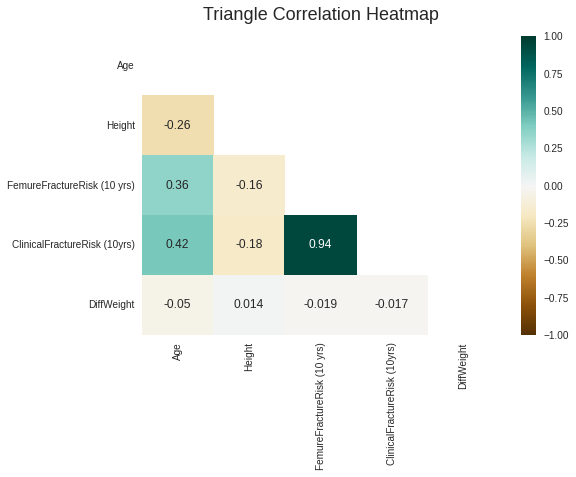

In [409]:
df = pd.DataFrame(XTrain[['Age','Height','FemureFractureRisk (10 yrs)','ClinicalFractureRisk (10yrs)','DiffWeight']])
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

**PERFORMING FEATURE SELECTION **

In [410]:
# Feature selection
correlationMatrix = XTrain.corr().abs()
#print(correlationMatrix)

upper_tri = correlationMatrix.where(np.triu(np.ones(correlationMatrix.shape),k=1).astype(np.bool8))
#print(upper_tri)

to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]
print(to_drop)

XTrain.drop(columns = to_drop, axis = 1, inplace = True)

XTest.drop(columns = to_drop, axis = 1, inplace = True)

['ClinicalFractureRisk (10yrs)', 'Alcohol_Yes<3', 'FractureFamilialHistory_Yes', 'PreviousNonFemurFractures_Yes1', 'Steroid_No']


In [411]:
correlationMatrix

,Age,Height,FemureFractureRisk (10 yrs),ClinicalFractureRisk (10yrs),StartTscore,DiffWeight,Smoking_No,Smoking_Si<10,Smoking_Si>10,Alcohol_No,Alcohol_Yes<3,Alcohol_Yes>3,FractureFamilialHistory_No,FractureFamilialHistory_Yes,PreviousFemureFractures_No,PreviousFemureFractures_Yes1,PreviousFemureFractures_Yes2,PreviousFemureFractures_Yes>1,PreviousFemureFractures_Yes>2,PreviousNonFemurFractures_No,PreviousNonFemurFractures_Yes,PreviousNonFemurFractures_Yes1,PreviousNonFemurFractures_Yes2,PreviousNonFemurFractures_Yes>2,Other disaese_Altre connettiviti,Other disaese_Artrite psoriasica,Other disaese_Artrite reumatoide,Other disaese_Lupus,Other disaese_No,Other disaese_Sclerodermia,Steroid_>2.5<5mg,Steroid_>5mg,Steroid_No,BMD_Femure neck,BMD_Femure total,BMD_Spine,BMD_US calcaneus,BMD_US phalanx,CurrentTherapies_SERMS o ormoni,CurrentTherapies_alendronato,CurrentTherapies_alendronato + vit. D,CurrentTherapies_denosumab,CurrentTherapies_ibandronato,CurrentTherapies_none,CurrentTherapies_ranelato di stronzio,CurrentTherapies_risedronato,CurrentTherapies_teriparatide,CurrentTherapies_zoledronato,PrescribedTherapy_SERMS o ormoni,PrescribedTherapy_alendronato,PrescribedTherapy_alendronato + vit. D,PrescribedTherapy_denosumab,PrescribedTherapy_ibandronato,PrescribedTherapy_none,PrescribedTherapy_ranelato di stronzio,PrescribedTherapy_risedronato,PrescribedTherapy_teriparatide,PrescribedTherapy_zoledronato
Age,1.000000,0.256629,0.355135,0.417150,0.087336,0.049735,0.132245,0.083854,0.100417,0.048035,0.048307,0.000965,0.078595,0.078595,0.260384,0.152618,0.131588,0.003779,0.146927,0.084439,0.013748,0.064254,0.038285,0.041963,0.028854,0.015120,0.008753,0.016341,0.013010,0.007086,0.019499,0.000667,0.016166,0.068273,0.055271,0.157640,0.068155,0.050609,0.072664,0.075901,0.117545,0.174218,0.022103,0.224876,0.007380,0.054704,0.088130,0.076719,0.006172,0.010402,0.070724,0.187266,0.031415,0.205910,0.002281,0.036552,0.091857,0.072964
Height,0.256629,1.000000,0.162122,0.179262,0.145309,0.013757,0.055962,0.033022,0.045448,0.020867,0.018898,0.013760,0.029321,0.029321,0.119039,0.071051,0.052893,0.011447,0.073525,0.025813,0.015899,0.009991,0.026518,0.022095,0.015196,0.013693,0.033581,0.016069,0.005771,0.026003,0.017908,0.015753,0.023816,0.065586,0.011166,0.043573,0.058307,0.061055,0.001109,0.048069,0.027592,0.089441,0.021696,0.103560,0.011000,0.011476,0.035718,0.038919,0.013189,0.051570,0.012127,0.073906,0.026135,0.107178,0.024603,0.033750,0.022683,0.030041
FemureFractureRisk (10 yrs),0.355135,0.162122,1.000000,0.943307,0.291725,0.019212,0.046134,0.007401,0.079008,0.032573,0.034491,0.010426,0.061645,0.061645,0.532100,0.187311,0.335729,0.029118,0.426243,0.072545,0.008350,0.062123,0.030627,0.018586,0.039047,0.009219,0.068888,0.001092,0.072479,0.000574,0.099685,0.140780,0.161665,0.053615,0.111603,0.142524,0.002142,0.008415,0.022780,0.038901,0.070472,0.273501,0.004627,0.263755,0.014013,0.018879,0.253570,0.102384,0.010161,0.015244,0.041630,0.302260,0.008135,0.286477,0.003122,0.011764,0.238378,0.093697
ClinicalFractureRisk (10yrs),0.417150,0.179262,0.943307,1.000000,0.232596,0.016917,0.004987,0.035121,0.049719,0.037108,0.039017,0.010108,0.000007,0.000007,0.678152,0.240720,0.438712,0.039860,0.529433,0.069310,0.008552,0.054833,0.032835,0.025815,0.033986,0.018834,0.081813,0.002894,0.080504,0.001424,0.110075,0.156943,0.179331,0.035461,0.112466,0.127108,0.010768,0.005382,0.024746,0.044363,0.089727,0.318711,0.015383,0.317164,0.020488,0.025068,0.295879,0.127182,0.010908,0.017665,0.046557,0.342338,0.019861,0.332474,0.008044,0.013893,0.280695,0.121661
StartTscore,0.087336,0.145309,0.291725,0.232596,1.000000,0.002650,0.008254,0.008882,0.001890,0.007293,0.011322,0.025342,0.023073,0.023073,0.012258,0.011711,0.004347,0.003286,0.037599,0.051187,0.007822,0.052929,0.008783,0.005604,0.012808,0.029293,0.037497,0.034266,0.050900,0.003151,0.043961,0.003386,0.035416,0.105250,0.037037,0.178976,0.035366,0.081201,0.002604,0.038171,0.009432,0.070308,0.024058,0.089279,0.016298,0.034458,

In [412]:
XTrain

,Age,Height,FemureFractureRisk (10 yrs),StartTscore,DiffWeight,Smoking_No,Smoking_Si<10,Smoking_Si>10,Alcohol_No,Alcohol_Yes>3,FractureFamilialHistory_No,PreviousFemureFractures_No,PreviousFemureFractures_Yes1,PreviousFemureFractures_Yes2,PreviousFemureFractures_Yes>1,PreviousFemureFractures_Yes>2,PreviousNonFemurFractures_No,PreviousNonFemurFractures_Yes,PreviousNonFemurFractures_Yes2,PreviousNonFemurFractures_Yes>2,Other disaese_Altre connettiviti,Other disaese_Artrite psoriasica,Other disaese_Artrite reumatoide,Other disaese_Lupus,Other disaese_No,Other disaese_Sclerodermia,Steroid_>2.5<5mg,Steroid_>5mg,BMD_Femure neck,BMD_Femure total,BMD_Spine,BMD_US calcaneus,BMD_US phalanx,CurrentTherapies_SERMS o ormoni,CurrentTherapies_alendronato,CurrentTherapies_alendronato + vit. D,CurrentTherapies_denosumab,CurrentTherapies_ibandronato,CurrentTherapies_none,CurrentTherapies_ranelato di stronzio,CurrentTherapies_risedronato,CurrentTherapies_teriparatide,CurrentTherapies_zoledronato,PrescribedTherapy_SERMS o ormoni,PrescribedTherapy_alendronato,PrescribedTherapy_alendronato + vit. D,PrescribedTherapy_denosumab,PrescribedTherapy_ibandronato,PrescribedTherapy_none,PrescribedTherapy_ranelato di stronzio,PrescribedTherapy_risedronato,PrescribedTherapy_teriparatide,PrescribedTherapy_zoledronato
30643,0.681818,0.608696,0.033816,0.40,0.51,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
18557,0.272727,0.666667,0.006689,1.00,0.50,1,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
21203,0.159091,0.608696,0.008021,0.50,0.58,1,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5125,0.295455,0.637681,0.005481,0.72,0.50,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
26477,0.318182,0.710145,0.005760,0.60,0.68,1,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29021,0.136364,0.768116,0.003128,0.42,0.53,1,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3411,0.340909,0.594203,0.022080,0.56,0.46,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
12103,0.136364,0.695652,0.002477,0.60,0.50,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
660,0.477273,0.463768,0.114332,0.46,0.48,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


**PERFORMING OVERSAMPLING**

In [413]:

smote = SMOTE()

# Use the fit_sample method to oversample the training data
X_train_resampled, y_train_resampled = smote.fit_resample(XTrain, yTrain)

**PLOTTING OVERSAMPLED CATEGORIES IN TARGED ATTRIBUTE**

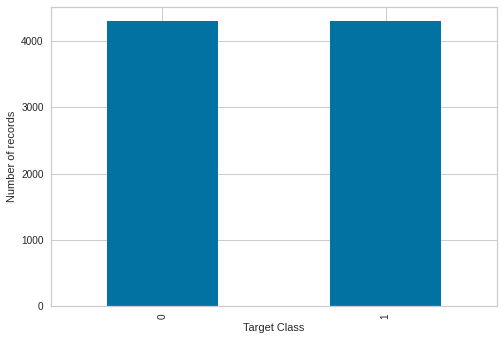

In [414]:
count = y_train_resampled.value_counts()
count.plot.bar()
plt.ylabel('Number of records')
plt.xlabel('Target Class')
plt.show()

**LOOKING AT FEATURE IMPORTANCE **

In [415]:

model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)
importances = pd.DataFrame(data={
    'Attribute': X_train_resampled.columns,
    'Importance': model.coef_[0]
})

importances = importances.sort_values(by='Importance', ascending=False)
print(importances)

                                 Attribute  Importance
4                               DiffWeight    2.264203
0                                      Age    0.587975
10              FractureFamilialHistory_No   -0.047427
8                               Alcohol_No   -0.112220
16            PreviousNonFemurFractures_No   -0.149082
9                            Alcohol_Yes>3   -0.158551
19         PreviousNonFemurFractures_Yes>2   -0.185301
17           PreviousNonFemurFractures_Yes   -0.376426
26                        Steroid_>2.5<5mg   -0.543031
1                                   Height   -0.550736
14           PreviousFemureFractures_Yes>1   -0.736809
18          PreviousNonFemurFractures_Yes2   -0.836429
49  PrescribedTherapy_ranelato di stronzio   -0.858374
27                            Steroid_>5mg   -0.873161
28                         BMD_Femure neck   -1.023729
48                  PrescribedTherapy_none   -1.059211
43        PrescribedTherapy_SERMS o ormoni   -1.143037
23        

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**TRAINING THE SVM MODEL AND PREDICTING**

In [416]:
from sklearn.svm import SVC
classifierSVM = SVC(kernel = 'linear', random_state = 0,probability=True)
classifierSVM.fit(X_train_resampled, y_train_resampled)
y_predSVM = classifierSVM.predict(XTest)


**PLOTTING THE CONFUSION MATRIX**

[[0.85168871 0.14831129]
 [0.59898197 0.40101803]
 [0.90282501 0.09717499]
 ...
 [0.53727642 0.46272358]
 [0.60347245 0.39652755]
 [0.56436243 0.43563757]]
[0 0 0 ... 0 0 0]
[[763 328]
 [ 73 117]]


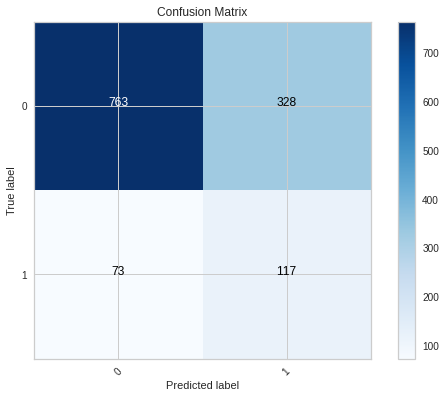

In [417]:
def plot_confusion_matrix(cm, classes,
                        normalize = False,
                        title = 'Confusion matrix',
                        cmap = plt.cm.Blues):

    plt.imshow(cm, interpolation = 'nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment = "center",
            color = "white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
cm_plot_labels = [0,1]
predictions = classifierSVM.predict_proba(
      XTest
)  

print(predictions)

rounded_predictions = np.argmax(predictions, axis = 1)

print(rounded_predictions)
cm = confusion_matrix(y_true = yTest, y_pred = rounded_predictions)
plot_confusion_matrix(cm = cm, classes = cm_plot_labels, title = 'Confusion Matrix')

**LOOKING AT CLASSIFICATION REPORT**

In [418]:
report = classification_report(yTest, rounded_predictions)

print(report)

              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1091
           1       0.26      0.62      0.37       190

    accuracy                           0.69      1281
   macro avg       0.59      0.66      0.58      1281
weighted avg       0.82      0.69      0.73      1281



**PLOTTING ROC CURVE**

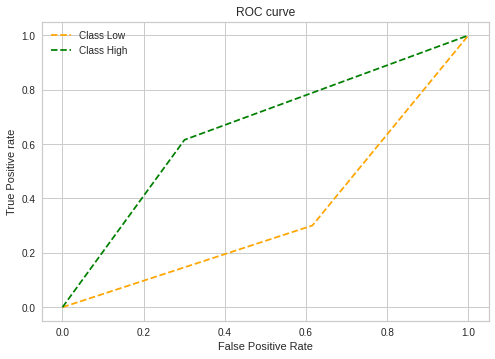

In [419]:
fpr = {}
tpr = {}
thresh = {}

for i in range(2):    
    fpr[i], tpr[i], thresh[i] = roc_curve(yTest, rounded_predictions, pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class Low')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class High')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);